# Imports
Run this code to import necessary modules. Note that the functions ``cost_function`` and ``gradient`` imported from module ``gd`` are stubs. You will need to fill in the code in ``gd.py``.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

from gd import cost_function, gradient  # stubs

# Create a simple data set

Run this cell to generate and plot some data from the linear model $y \approx -1 + 2x$, that is, $\theta_0 = -1$ and  $\theta_1 = 2$.

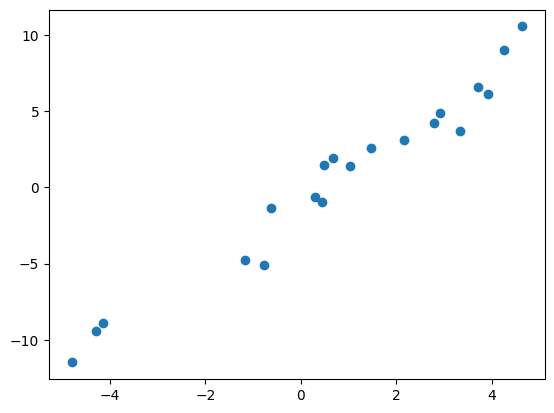

In [2]:
# Set the random seed so the program will always generate the same data
np.random.seed(0)

# Generate n random x values between -5 and 5
n = 20
x = 10 * np.random.rand(n) - 5

# Generate y values from the model y ~= 2x - 1
epsilon = np.random.randn(n)
y = -1 + 2*x + epsilon

plt.plot(x, y, marker='o', linestyle='none')
plt.show()

# TODO: implement the cost function
The squared error cost function is
$$\frac{1}{2} \sum_{i=1}^m \big(h_\theta(x^{(i)}) - y^{(i)}\big)^2=\frac{1}{2} \sum_{i=1}^m \big(\theta_{0}+\theta_{1}x^{(i)} - y^{(i)}\big)^2
.$$
*Note: the superscript of $i$ represents the iteration number, not the expontent.

Open the file ``gd.py`` and implement ``cost_function``. Then run this cell to test it out.

In [4]:
print(cost_function(x, y, 0,  1))   # should print 104.772951994
print(cost_function(x, y, 2, -1))   # should print 744.953822077
print(cost_function(x, y, -1, 2))   # should print 14.090816198

104.77295199433607
744.9538220768486
14.090816198013721


# Plotting setup
Run this cell. It sets up a routine ``plot_model`` that will be called later to illustrate the progress of gradient descent.

In [5]:
# Construct a dense grid of (theta_0, theta_1) values
theta0_vals = np.linspace(-10, 10)
theta1_vals = np.linspace(-10, 10)
[THETA0, THETA1] = np.meshgrid(theta0_vals, theta1_vals)

# Define a cost function that has x and y "baked in"
def mycost(theta0, theta1):
    return cost_function(x, y, theta0, theta1)

# Now vectorize this cost function and apply it simultaneously to all
# pairs in dense grid of (theta_0, theta_1) values
mycost_vectorized = np.vectorize(mycost)
J_SURF = mycost_vectorized(THETA0, THETA1)

# Define the test inputs
x_test = np.linspace(-5, 5, 100)

fig = plt.figure(1, figsize=(10,4))

# Create the figure
def init_plot():
    fig.clf();

    # Build left subplot (cost function)
    ax1 = fig.add_subplot(1, 2, 1); 
    ax1.contour(THETA0, THETA1, J_SURF, 20)
    ax1.set_xlabel('Intercept theta_0')
    ax1.set_ylabel('Slope theta_1')
    ax1.set_xlim([-10, 10])
    ax1.set_ylim([-10, 10])

    # The data will be added later for these plot elements:
    line, = ax1.plot([], []);
    dot,  = ax1.plot([], [], marker='o');

    # Build right subplot (data + current hypothesis)
    ax2 = fig.add_subplot(1, 2, 2);
    ax2.plot(x, y, marker='o', linestyle='none') 
    ax2.set_xlim([-6, 6])
    ax2.set_ylim([-10, 10])

    # The data will be added later for this:
    hyp, = ax2.plot( x_test, 0*x_test )
    
    return line, dot, hyp


# Define a function to update the plot
def update_plot(theta_0, theta_1, line, dot, hyp):
    line.set_xdata( np.append(line.get_xdata(), theta_0 ) )
    line.set_ydata( np.append(line.get_ydata(), theta_1 ) )
    dot.set_xdata([theta_0])
    dot.set_ydata([theta_1])
    hyp.set_ydata( theta_0 + theta_1 * x_test )

<Figure size 1000x400 with 0 Axes>

# TODO: implement gradient descent

In this cell you will implement gradient descent. Follow these steps:

1. The gradient of $J(\theta_0, \theta_1)$ wrt $\theta_0$ and $\theta_1$ can be calculated as these two partial derivatives: $\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)=\sum_{i=1}^m \big(\theta_{0}+\theta_{1}x^{(i)} - y^{(i)}\big)$ and $\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)=\sum_{i=1}^m \big(\theta_{0}+\theta_{1}x^{(i)} - y^{(i)}\big)x^{(i)}$ for our model and cost function. 
*Note: the superscript of $i$ represents the iteration number, not the expontent.

1. Implement the function ``gradient`` in ``gd.py`` to return these two partial derivatives.
2. The code below is completed for gradient descent:
    * Select a step size
    * Run for a fixed number of iterations (say, 20 or 200)
    * Update theta_0 and theta_1 using the partial derivatives
    * Record the value of the cost function attained in each iteration of gradient descent so you can examine its progress.

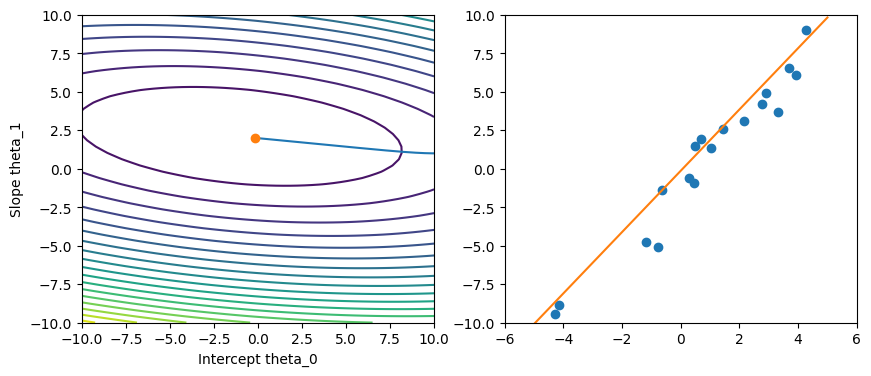

In [11]:
line, dot, hyp = init_plot()

iters = 300  # change as needed

# Intialize theta_0, theta_1, and step size

theta_0 = 20
theta_1 = 20
alpha = 0.011
change1 = 0
change2 = 0
costValues = []
for i in range(0, iters):
    current_cost = cost_function(x, y, theta_0, theta_1)
    costValues.append(current_cost)

    d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)

    change1 = alpha * d_theta_0
    change2 = alpha * d_theta_1

    theta_0 = theta_0 - change1
    theta_1 = theta_1 - change2

    clear_output(wait=True)
    update_plot(theta_0, theta_1, line, dot, hyp)
    display(fig)
    


# Assess convergence
Here we plot the cost function vs. iteration. Did the algorithm converge? (Converging means it found the actual setting of $\theta$ that minimizes the cost. If the cost went up or did not go down as far as it could, it did not converge.)

Text(0, 0.5, 'cost')

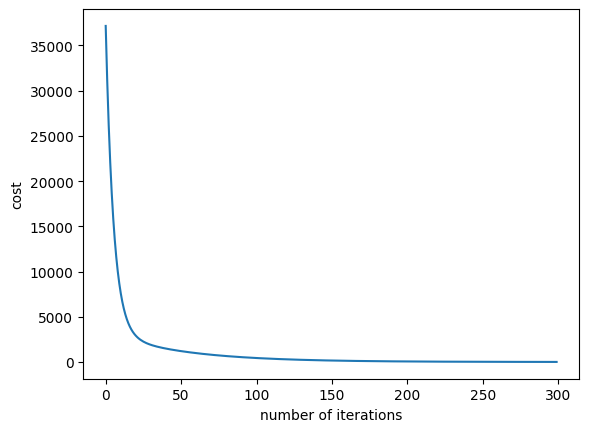

In [12]:
t = []
for i in range(iters):
    t.append(i)

# plotting the cost function at different iterations
plt.plot(t,costValues)
plt.xlabel('number of iterations')
plt.ylabel('cost')

# TODO: experiment with step size

After you have completed the implementation, do some experiments with different numbers of iterations and step sizes to assess convergence of the algorithm. Currently, the iteration number is set to 200 and step size is alpha = 0.011. Report the following:
* A step size for which the algorithm converges to the minimum in at most 200 iterations
* A step size for which the algorithm converges, but it takes more than 200 iterations
* A step size for which the algorithm does not converge, no matter how many iterations are run

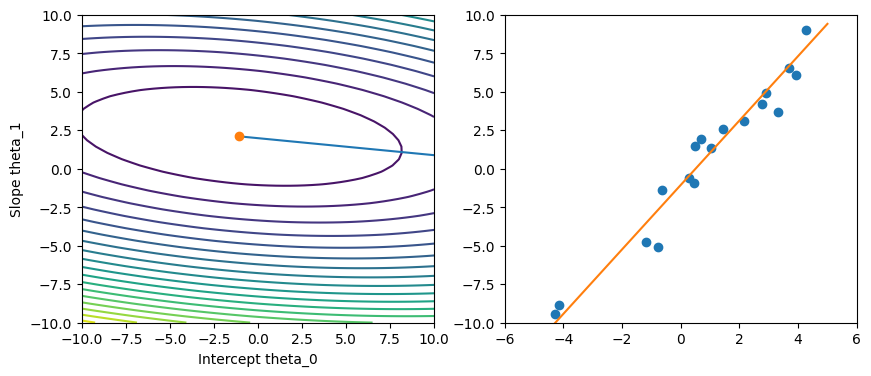

In [ ]:
# Converges to minimum in at most 200 iterations

line, dot, hyp = init_plot()

iters = 200  # change as needed

# Intialize theta_0, theta_1, and step size

theta_0 = 20
theta_1 = 20
alpha = 0.1
change1 = 0
change2 = 0
costValues = []
for i in range(0, iters):
    current_cost = cost_function(x, y, theta_0, theta_1)
    costValues.append(current_cost)

    d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)

    change1 = alpha * d_theta_0
    change2 = alpha * d_theta_1

    theta_0 = theta_0 - change1
    theta_1 = theta_1 - change2

    clear_output(wait=True)
    update_plot(theta_0, theta_1, line, dot, hyp)
    display(fig)
    

Text(0, 0.5, 'cost')

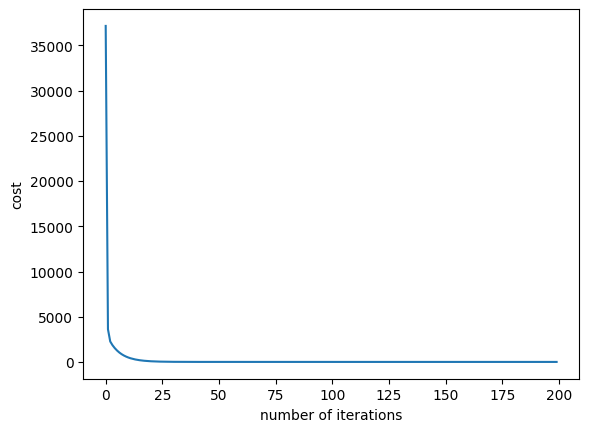

In [30]:
t = []
for i in range(iters):
    t.append(i)

# plotting the cost function at different iterations
plt.plot(t,costValues)
plt.xlabel('number of iterations')
plt.ylabel('cost')

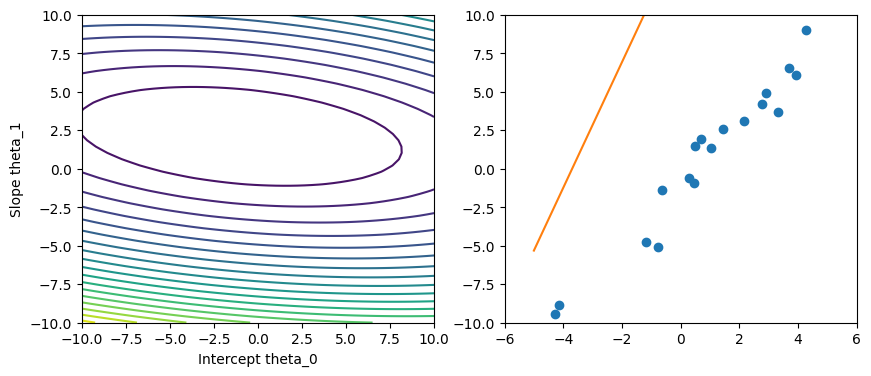

In [ ]:
# Converges to minimum but requires more than 200 iterations

line, dot, hyp = init_plot()

iters = 200  # change as needed

# Intialize theta_0, theta_1, and step size

theta_0 = 20
theta_1 = 20
alpha = 0.001
change1 = 0
change2 = 0
costValues = []
for i in range(0, iters):
    current_cost = cost_function(x, y, theta_0, theta_1)
    costValues.append(current_cost)

    d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)

    change1 = alpha * d_theta_0
    change2 = alpha * d_theta_1

    theta_0 = theta_0 - change1
    theta_1 = theta_1 - change2

    clear_output(wait=True)
    update_plot(theta_0, theta_1, line, dot, hyp)
    display(fig)

Text(0, 0.5, 'cost')

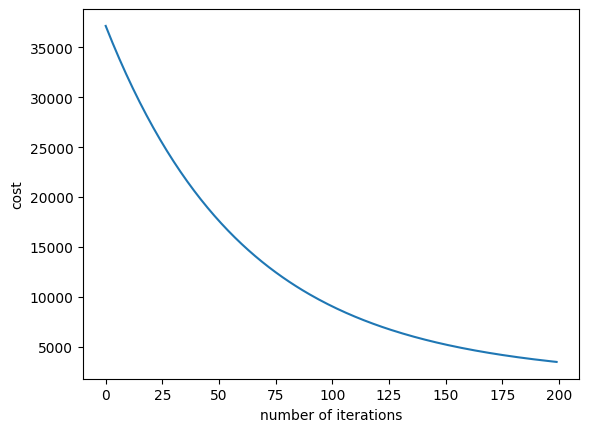

In [26]:
t = []
for i in range(iters):
    t.append(i)

# plotting the cost function at different iterations
plt.plot(t,costValues)
plt.xlabel('number of iterations')
plt.ylabel('cost')

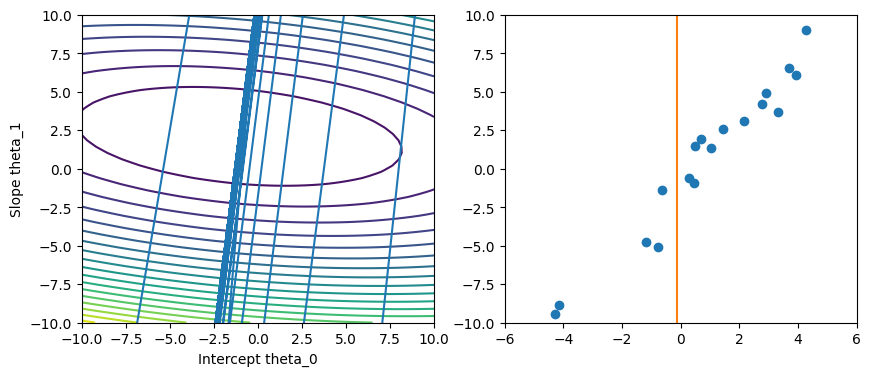

In [ ]:
# Diverges no matter amount of iterations

line, dot, hyp = init_plot()

iters = 200  # change as needed

# Intialize theta_0, theta_1, and step size

theta_0 = 20
theta_1 = 20
alpha = 0.5
change1 = 0
change2 = 0
costValues = []
for i in range(0, iters):
    current_cost = cost_function(x, y, theta_0, theta_1)
    costValues.append(current_cost)

    d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)

    change1 = alpha * d_theta_0
    change2 = alpha * d_theta_1

    theta_0 = theta_0 - change1
    theta_1 = theta_1 - change2

    clear_output(wait=True)
    update_plot(theta_0, theta_1, line, dot, hyp)
    display(fig)

Text(0, 0.5, 'cost')

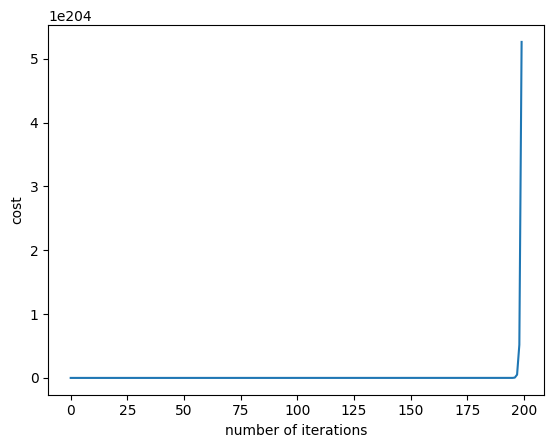

In [28]:
t = []
for i in range(iters):
    t.append(i)

# plotting the cost function at different iterations
plt.plot(t,costValues)
plt.xlabel('number of iterations')
plt.ylabel('cost')